# MICRO-PROYECTO2 (12%) - CLUSTERING

## Integrantes





*   Hinara Pastora Sánchez Mata
*   Anna Ospina Bedoya
*   Juan José Tobón Zapata

##Context

###Problem Statement

Customer Personality Analysis is a detailed analysis of a company's ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company's database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

##Content


###People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if customer complained in the last 2 years, 0 otherwise

###Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

###Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

###Place

- NumWebPurchases: Number of purchases made through the company's web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to companyâ€™s web site in the last month

###Target

Need to perform clustering to summarize customer segments.

##Código

### Preprocesamiento

Para tenerlo en cuenta, los datos estaban separados por tabulación, entonces hicimos preprocesamiento de datos en excel en donde se utilizo una funcion avanzada para poner el texto en columnas

In [ ]:
import pandas as pd

dataset = pd.read_csv("marketing_campaign.csv",delimiter=';')
dataset.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
dataset.shape

(2240, 29)

In [ ]:
#
# Búsqueda de valores nulos
#
dataset.isna().sum()


,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
# Se eliminan los registros nulos
#
dataset = dataset.dropna()
dataset.isna().sum()
dataset.shape

(2216, 29)

In [ ]:
# prompt: elimina la columna Z_CostContact and Z_Revenue

clean_dataset = dataset.drop(['Z_CostContact', 'Z_Revenue'], axis=1)


In [ ]:
clean_dataset.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/09/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/03/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
import scipy.cluster.hierarchy as shc
from scipy.spatial import distance_matrix
from pylab import rcParams

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import manifold, datasets
import sklearn.metrics as sm
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (12, 5)
plt.style.use('ggplot')

In [ ]:
# Mezcla los datos de manera aleatoria
clean_dataset = clean_dataset.sample(frac=1).reset_index(drop=True)
clean_dataset.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5386,1953,Graduation,Together,94384.0,0,0,4/03/2013,62,1111,...,8,5,2,0,1,1,1,0,0,1
1,5177,1974,Master,Married,58494.0,0,1,12/12/2013,56,298,...,2,6,6,0,0,0,0,0,0,0
2,2930,1978,Master,Single,68092.0,0,0,16/12/2013,7,852,...,6,10,5,0,0,0,0,0,0,0
3,10855,1968,Master,Single,50014.0,1,0,22/01/2014,9,234,...,1,8,5,0,0,0,0,0,0,0
4,6605,1944,PhD,Divorced,55614.0,0,0,27/11/2013,85,504,...,4,6,7,0,1,0,0,0,0,0


In [ ]:
# prompt: puedes cambiar la columna Education y asignarle valores numericos segun la variable

education_mapping = {
    'Basic': 1,
    '2n Cycle': 2,
    'Graduation': 3,
    'Master': 4,
    'PhD': 5
}
clean_dataset['Education'] = clean_dataset['Education'].map(education_mapping)
clean_dataset.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5386,1953,3,Together,94384.0,0,0,4/03/2013,62,1111,...,8,5,2,0,1,1,1,0,0,1
1,5177,1974,4,Married,58494.0,0,1,12/12/2013,56,298,...,2,6,6,0,0,0,0,0,0,0
2,2930,1978,4,Single,68092.0,0,0,16/12/2013,7,852,...,6,10,5,0,0,0,0,0,0,0
3,10855,1968,4,Single,50014.0,1,0,22/01/2014,9,234,...,1,8,5,0,0,0,0,0,0,0
4,6605,1944,5,Divorced,55614.0,0,0,27/11/2013,85,504,...,4,6,7,0,1,0,0,0,0,0


In [ ]:
# prompt: haz lo mismo con Marital_status

marital_mapping = {
    'Single': 1,
    'Together': 2,
    'Married': 3,
    'Divorced': 4,
    'Widow': 5,
    'Alone': 6,
    'Absurd': 7,
    'YOLO': 8
}
clean_dataset['Marital_Status'] = clean_dataset['Marital_Status'].map(marital_mapping)
clean_dataset.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5386,1953,3,2,94384.0,0,0,4/03/2013,62,1111,...,8,5,2,0,1,1,1,0,0,1
1,5177,1974,4,3,58494.0,0,1,12/12/2013,56,298,...,2,6,6,0,0,0,0,0,0,0
2,2930,1978,4,1,68092.0,0,0,16/12/2013,7,852,...,6,10,5,0,0,0,0,0,0,0
3,10855,1968,4,1,50014.0,1,0,22/01/2014,9,234,...,1,8,5,0,0,0,0,0,0,0
4,6605,1944,5,4,55614.0,0,0,27/11/2013,85,504,...,4,6,7,0,1,0,0,0,0,0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Supongamos que 'data' es tu DataFrame con las características
# Preprocesamiento de datos
data=clean_dataset.drop(columns=['ID', 'Dt_Customer'])  # Eliminamos columnas no numéricas o identificadores

# Estandarización de los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Agrupamiento usando KMeans (puedes ajustar el número de clústeres)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=1000)
kmeans.fit(data_scaled)
data['Cluster'] = kmeans.labels_

# Random Forest para importancia de características
rf = RandomForestClassifier(n_estimators=100, random_state=1000)
rf.fit(data.drop('Cluster', axis=1), data['Cluster'])

# Obtener importancias de características
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = data.columns

# Mostrar las tres características más importantes
for f in range(25):
    print(f"{f + 1}. Feature {features[indices[f]]} ({importances[indices[f]]})")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



1. Feature MntWines (0.15399958775542244)
2. Feature Income (0.09944847102949966)
3. Feature MntMeatProducts (0.09721022267879574)
4. Feature NumStorePurchases (0.0875267006673101)
5. Feature MntFishProducts (0.06780390140370698)
6. Feature AcceptedCmp5 (0.06424116538191882)
7. Feature NumWebPurchases (0.05030547677369948)
8. Feature MntSweetProducts (0.04725139143945462)
9. Feature NumCatalogPurchases (0.04454889785387409)
10. Feature Teenhome (0.04398340744139869)
11. Feature MntFruits (0.04300873250037805)
12. Feature AcceptedCmp1 (0.03865617988151437)
13. Feature NumDealsPurchases (0.03366596781034369)
14. Feature NumWebVisitsMonth (0.022329005196573156)
15. Feature MntGoldProds (0.02165769146234724)
16. Feature Year_Birth (0.017799331490890573)
17. Feature AcceptedCmp2 (0.017616309831103447)
18. Feature Kidhome (0.014614435936640155)
19. Feature Recency (0.011679310538141856)
20. Feature Marital_Status (0.005422531949741101)
21. Feature AcceptedCmp4 (0.005301731475334672)
22. Feat

In [ ]:
train = np.array(clean_dataset[["NumStorePurchases","MntMeatProducts","Income"]])
train_labels = np.array(clean_dataset['Education'])
print(train.shape)

(2216, 3)


In [ ]:

# Calcula la media y los rangos intercuartiles para cada característica
Q1 = np.percentile(train, 25, axis=0)
Q3 = np.percentile(train, 75, axis=0)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Encuentra los índices de los datos atípicos
outlier_indices = np.any((train < lower_bound) | (train > upper_bound), axis=1)

# Elimina los datos atípicos
train_no_outliers = train[~outlier_indices]
train_labels_no_outliers = train_labels[~outlier_indices]

print(train_no_outliers.shape)
print(train_no_outliers)


(2037, 3)
[[6.0000e+00 6.8000e+01 5.8494e+04]
 [1.0000e+01 2.0700e+02 6.8092e+04]
 [8.0000e+00 7.7000e+01 5.0014e+04]
 ...
 [4.0000e+00 2.5000e+01 4.5204e+04]
 [8.0000e+00 1.4200e+02 5.2614e+04]
 [3.0000e+00 3.0000e+00 3.5946e+04]]


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



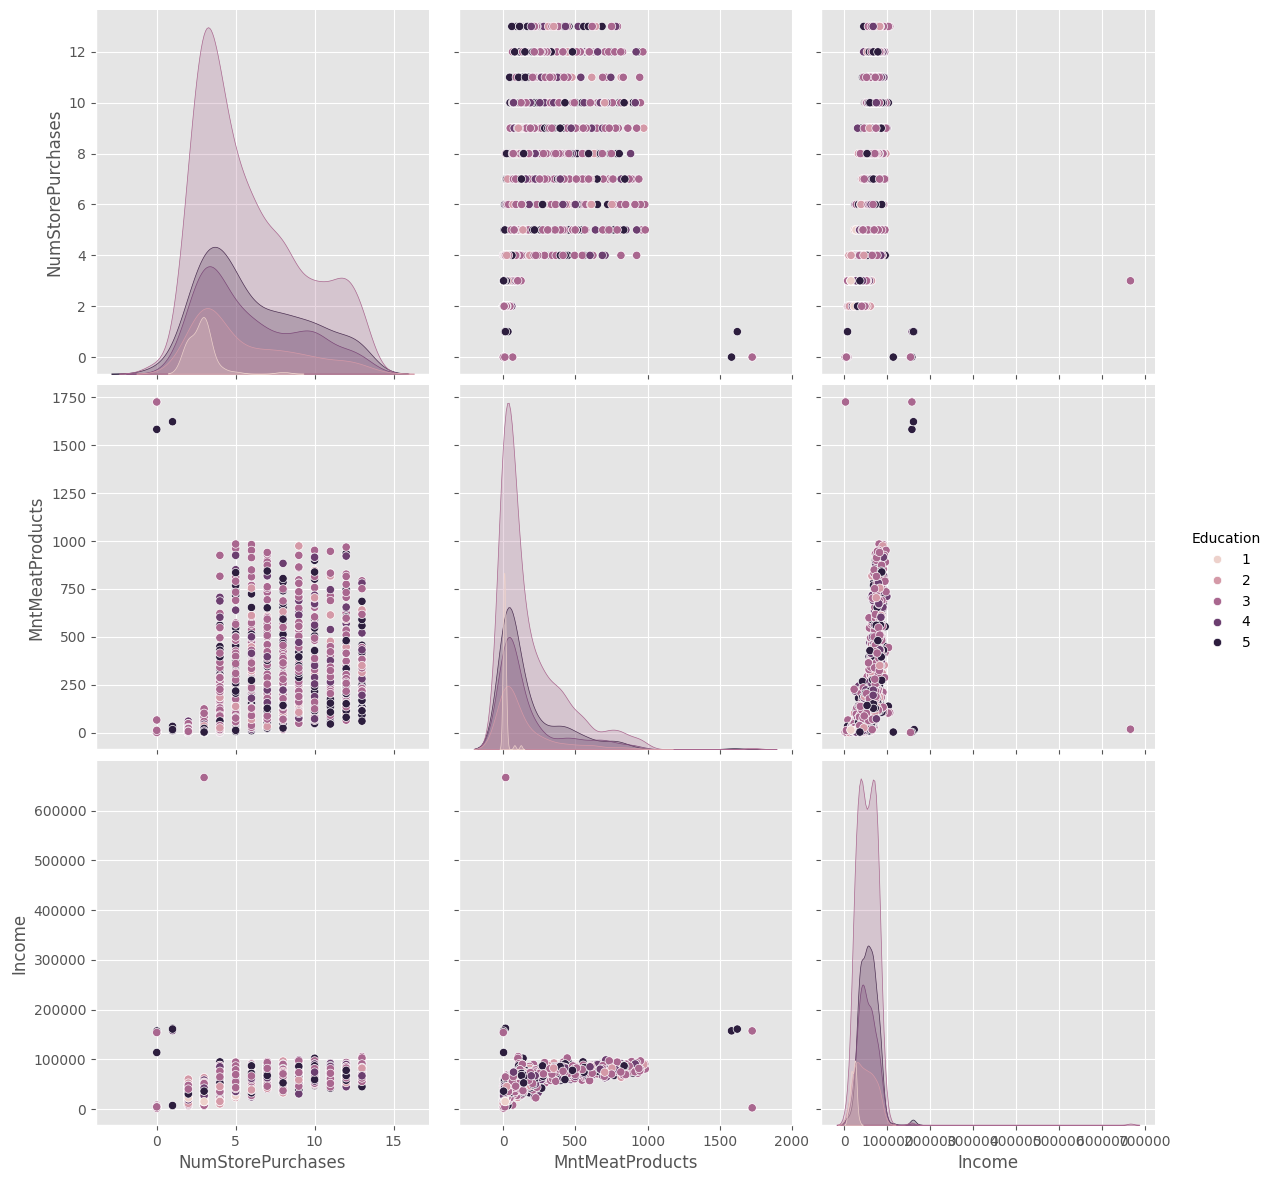

In [ ]:
sb.pairplot(clean_dataset, hue='Education',size=4,vars=["NumStorePurchases","MntMeatProducts","Income"],kind='scatter')

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import random
"""random.seed(9)
df = clean_dataset.sample(300)"""

fig = px.scatter_3d(train_no_outliers)
fig.show()

### Técnicas utilizadas para establecer el número de clústeres

In [ ]:

def elbow_curve(data, maxClusters = 15):

  # rango de valores del parámetro a optimizar (cantidad de clusters)
  maxClusters = range(1, maxClusters + 1)
  inertias = []

  # se ejecuta el modelo para el rango de clusters y se guarda la inercia
  # respectiva obtenida para cada valor
  for k in maxClusters:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(train)
    inertias.append(kmeanModel.inertia_)

  # Grafico de los resultados obtenidos para cada valor del rango
  print("Valores: ",inertias)
  plt.figure(figsize=(10, 8))
  plt.plot(maxClusters, inertias, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Inertia')
  plt.title('The Elbow Method showing the optimal k')
  plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Valores:  [1403722868995.6055, 674432441609.1621, 319225866345.1173, 183081160207.8064, 122187121263.40453, 80925514730.31987, 53453689756.707, 39959405353.29375, 30945705855.21363, 23730355427.33998]


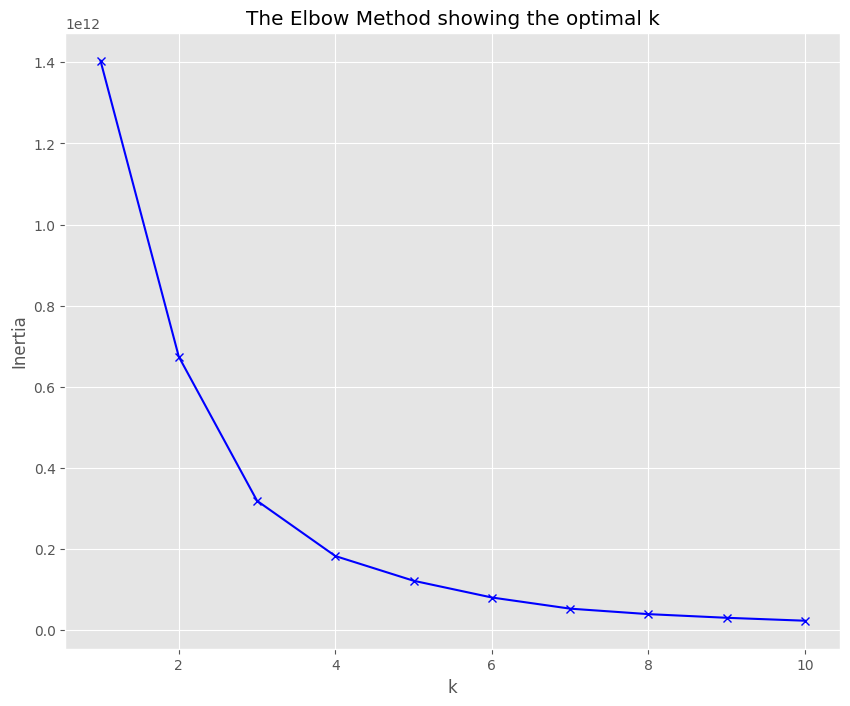

In [ ]:
elbow_curve(train, maxClusters = 10)

Es 7

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.6018754465644923


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : 0.6064338006447973


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4 The average silhouette_score is : 0.5419048246868111


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5 The average silhouette_score is : 0.5313379837008784


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6 The average silhouette_score is : 0.5386791485228712


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7 The average silhouette_score is : 0.5406609158308857


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8 The average silhouette_score is : 0.5242220908447809


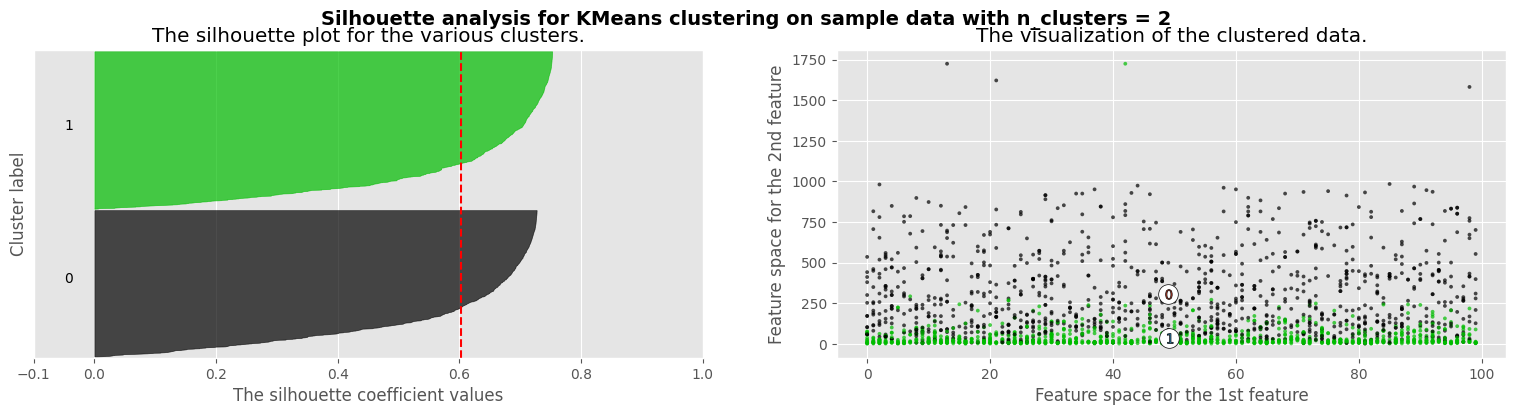

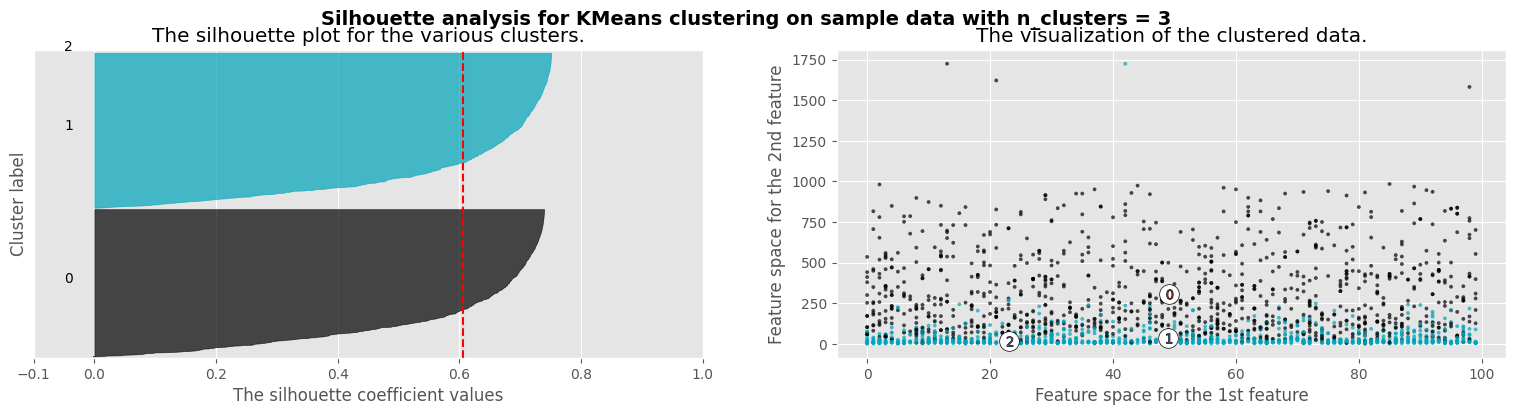

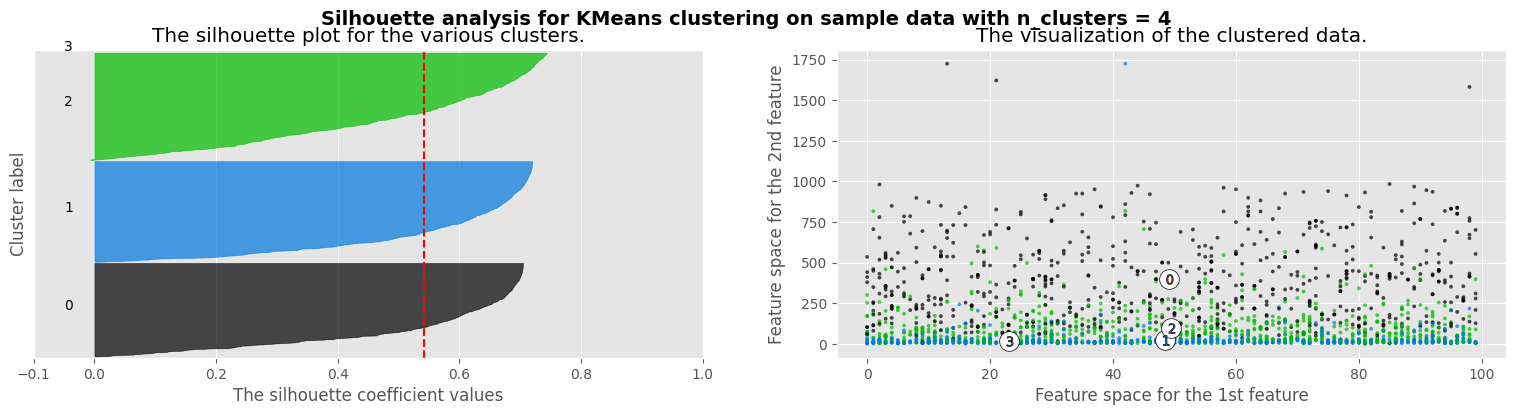

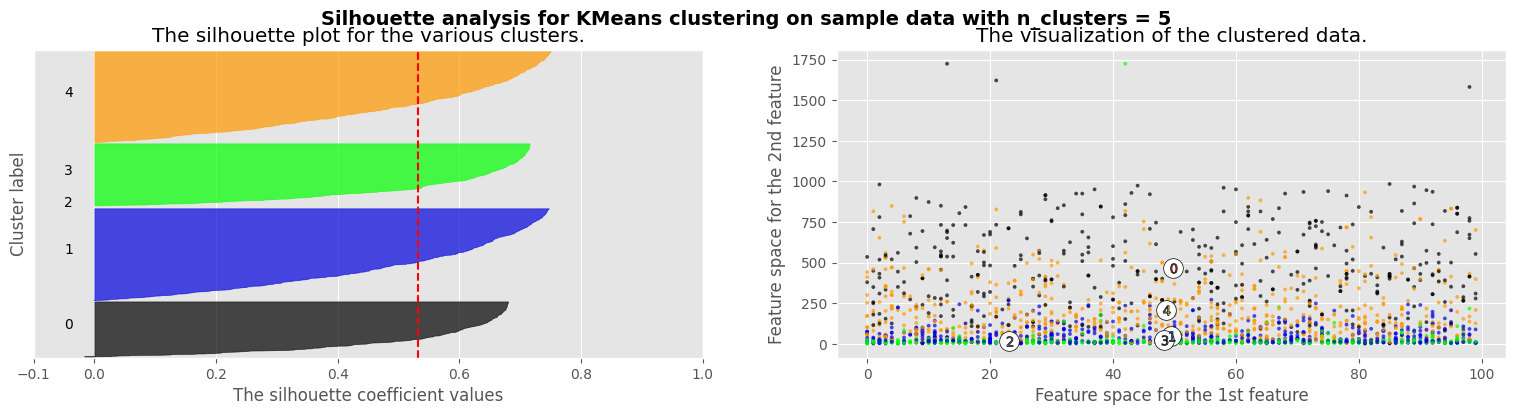

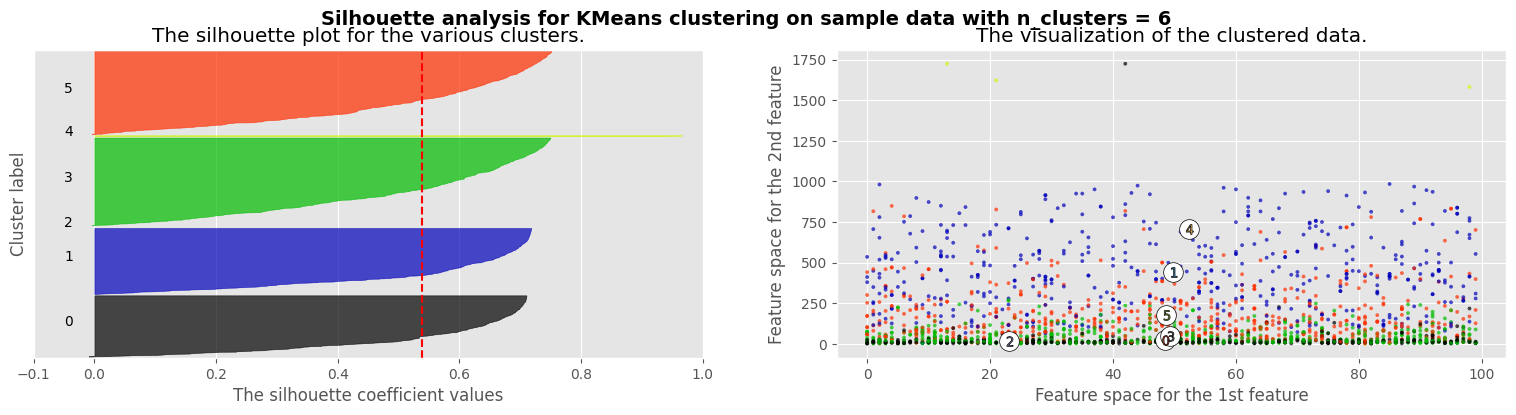

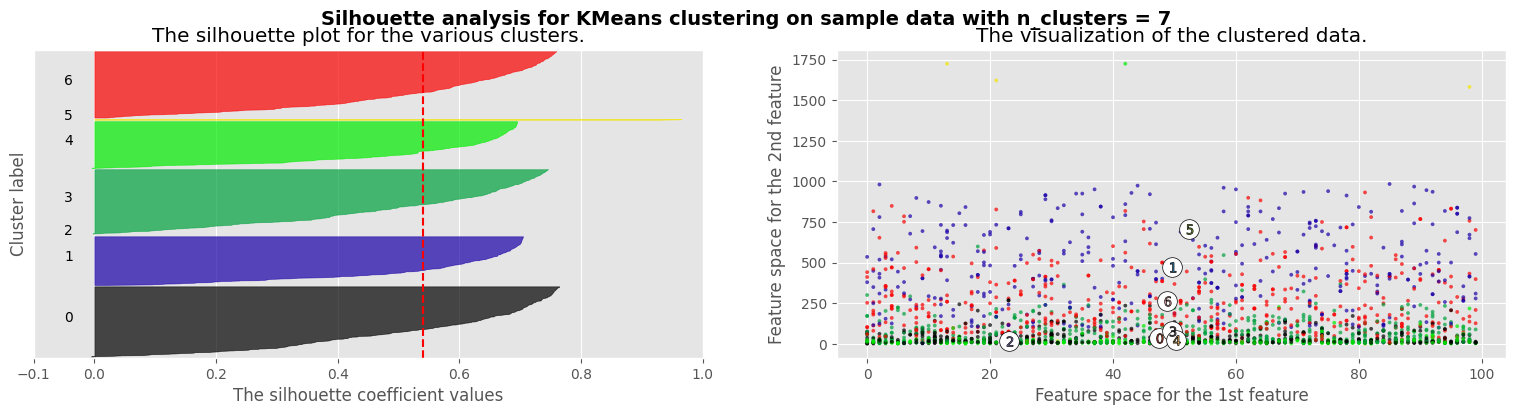

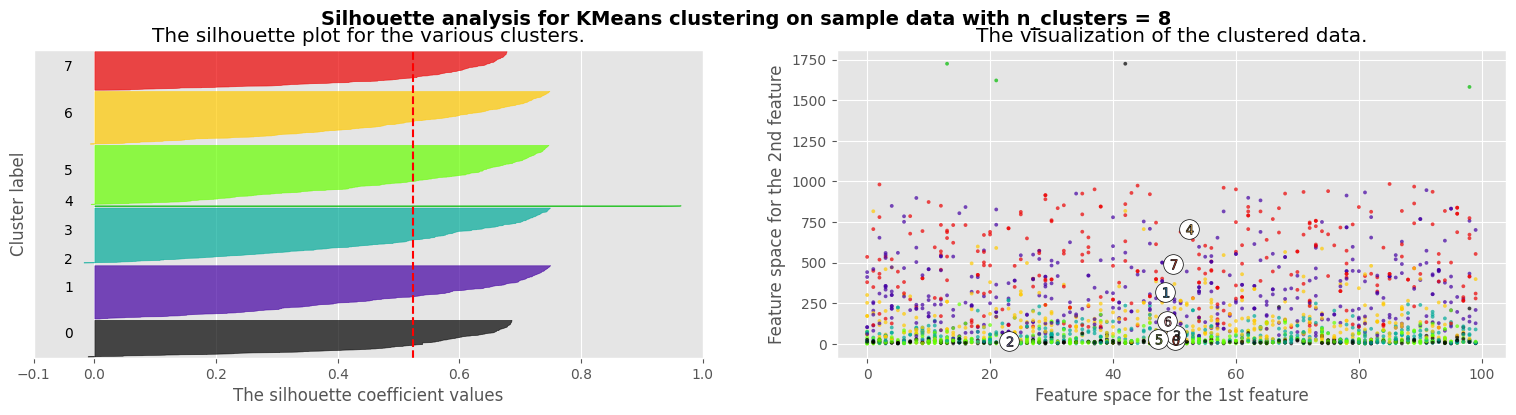

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

colors_k_means = ['cyan','purple','orange']
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
X = train

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(19, 4)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### Dendograma

In [ ]:
# Calcular el dendrograma
dist_matrix = sch.distance.pdist(X_scaled)
plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))

# Añadir línea de corte en el dendrograma
cut_height = 6
plt.axhline(y=cut_height, color='r', linestyle='--')

plt.title('Dendrogram')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

### Características más representativas